In [2]:
import torch
import numpy as np
import scipy
import matplotlib.pyplot as plt

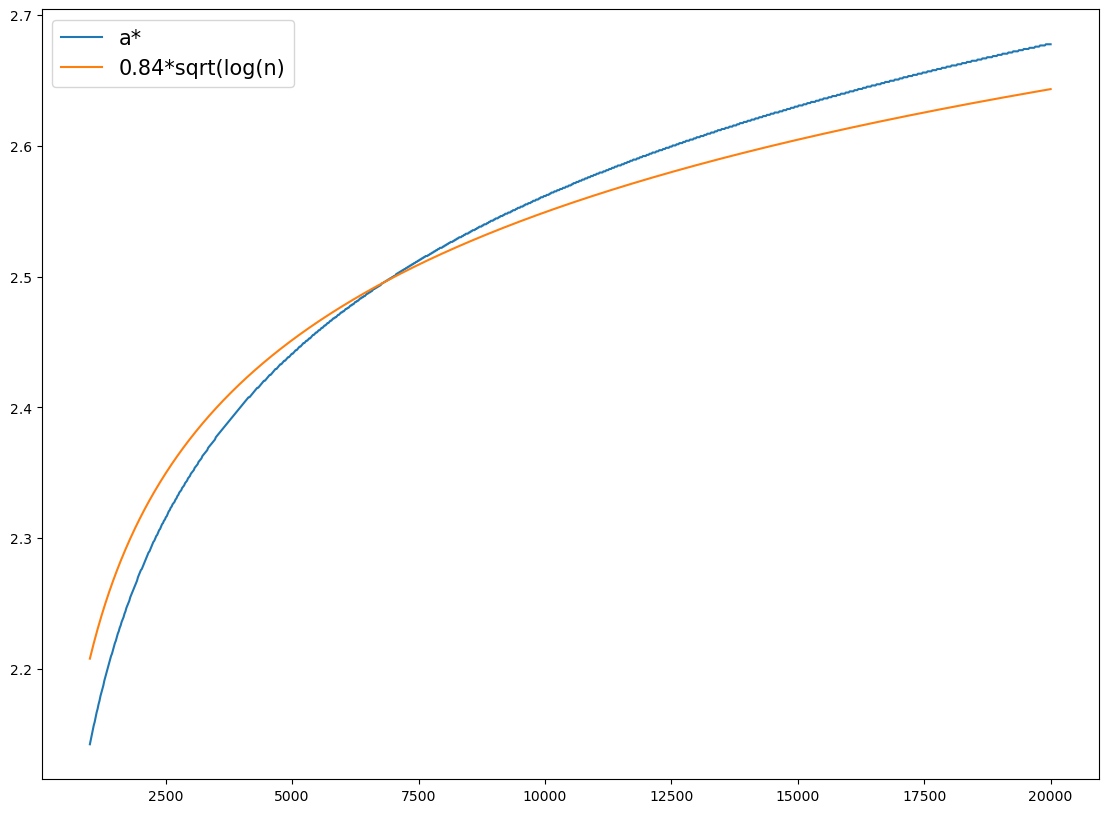

In [67]:
##https://kexue.fm/archives/9812
def find_opt_a(n):
    a = np.linspace(1, 10, 10000)
    l1 = a * ( 1 - np.exp(np.power(a, 2))/n)
    index = np.argmax(l1)
    a_opt = a[index]
    return a_opt


n = np.linspace(1000, 20000, 1000)
a = np.zeros_like(n)
m = 0
for i in n:
    a_opt = find_opt_a(i)
    a[m] = a_opt
    m += 1


fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(n, a , label='a*')
ax1.plot(n, 0.84 * np.sqrt(np.log(n)), label="0.84*sqrt(log(n)")
plt.legend(fontsize = 15)
plt.show()


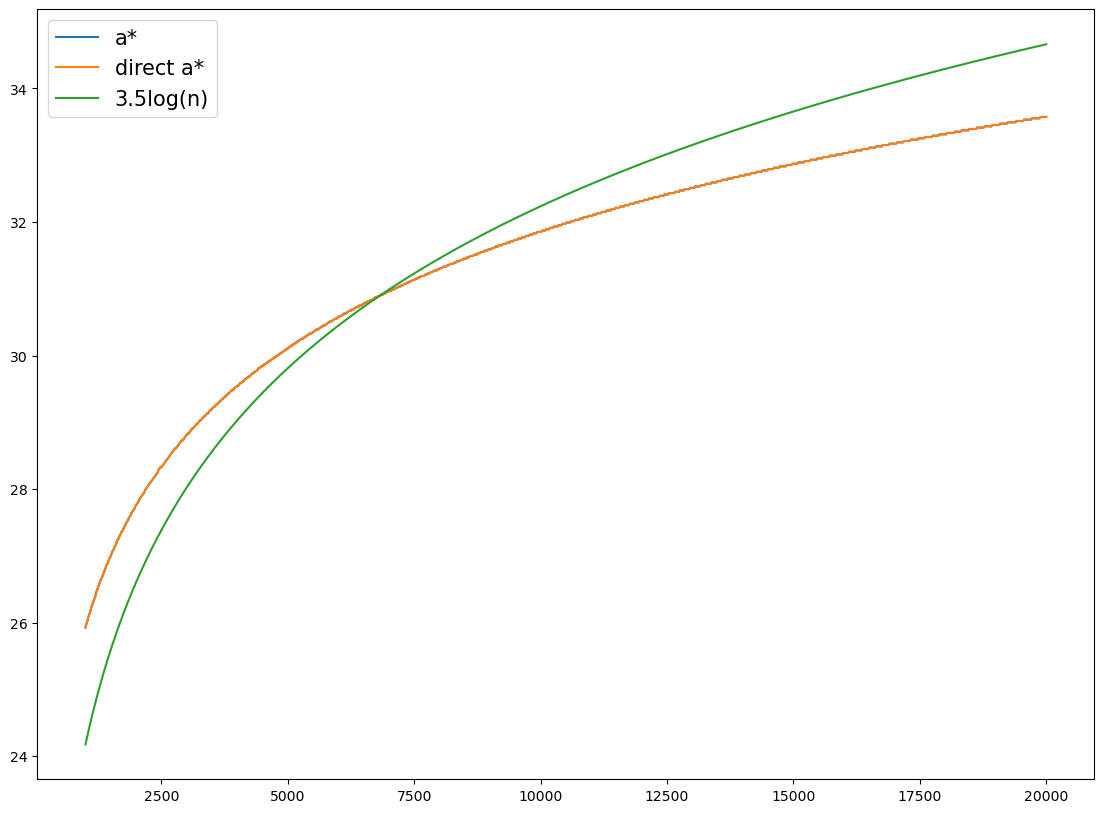

In [77]:
import scipy.special


def cal_expectation(a,n, d = 128):
    theta = np.linspace(0, np.pi, 300)
    cos_theta = np.cos(theta)
    unnormalized_p_theta = np.power(( 1 - cos_theta ** 2),  (d-3)/2)
    p_theta =  unnormalized_p_theta / np.sum(unnormalized_p_theta)
    direct_cal_p_theta = np.exp(scipy.special.gammaln(n/2)-scipy.special.gammaln((n-1)/2))/np.sqrt(np.pi) * unnormalized_p_theta
    direct_cal_p_theta = direct_cal_p_theta / np.sum(direct_cal_p_theta)
    #print("p - direct_p:{:.8f}".format(np.sum(np.abs(p_theta - direct_cal_p_theta))))
    a_cos_theta = np.matmul(a.reshape(-1,1), cos_theta.reshape(1,-1))
    exp_a = np.exp(a_cos_theta)
    exp_2a  = np.exp(2 * a_cos_theta)

    expection_a =  np.sum(exp_a * p_theta, axis= 1) **2
    expection_2a =  np.sum(exp_2a * p_theta, axis= 1) 
    direct_e_a =  np.sum(exp_a * direct_cal_p_theta, axis= 1) **2
    direct_e_2a =  np.sum(exp_2a * direct_cal_p_theta, axis= 1) 

    return expection_2a / expection_a / n,  direct_e_2a/direct_e_a/n



def find_opt_a(n, d=128):
    a = np.linspace(20, 40, 1000)
    ept, direct_ept = cal_expectation(a, n)
    l1= a * ( 1 - ept)
    direct_l1 = a * ( 1 - direct_ept)
    index1 = np.argmax(l1)
    index2 = np.argmax(direct_l1) 
    return a[index1], a[index2]

n = np.linspace(1000, 20000, 1000)
a = np.zeros_like(n)
b = np.zeros_like(n)
m = 0
for i in n:
    a[m], b[m]= find_opt_a(i)
    m += 1


fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(n, a, label='a*')
#ax1.plot(n, b, label='direct a*')
ax1.plot(n, 3.5 * np.log(n) , label='3.5log(n)')
plt.legend(fontsize=15)
plt.show()






In [106]:
n = 5
d = 2
scale = 10
q = torch.randn(n,d)
k = torch.randn(n, d)
v = torch.randn(n, d)

s_weight =  torch.softmax(torch.matmul(q, k.T) / np.sqrt(d), dim= 1)

q_hat = q / torch.sum( torch.pow(q,2) ,  axis = 1, keepdim= True) / scale
k_hat = k / torch.sum( torch.pow(k,2) ,  axis = 1, keepdim= True) /scale

q_k_hat = torch.matmul(q_hat, k_hat.T)
q_k = torch.exp(q_k_hat)
q_k_1 = q_k_hat + 1
weight_hat = q_k_1 / torch.sum(q_k_1, axis = 1)

q_softmax = torch.softmax(q, 1)
k_softmax = torch.softmax(k, 0)

q_k_softmax_weight =  torch.matmul(q_softmax, k_softmax.T)
print(s_weight)
print(q_k_softmax_weight.sum(1))
print( torch.sum( torch.pow(torch.abs(s_weight - q_k_softmax_weight),2)))




tensor([[0.2068, 0.1767, 0.1289, 0.4628, 0.0248],
        [0.3180, 0.1773, 0.2344, 0.1678, 0.1025],
        [0.1602, 0.1593, 0.0959, 0.5699, 0.0148],
        [0.2220, 0.1902, 0.1522, 0.3943, 0.0413],
        [0.1517, 0.1543, 0.1885, 0.0917, 0.4139]])
tensor([1., 1., 1., 1., 1.])
tensor(0.6216)


In [15]:
a = torch.from_numpy(np.array([[2,4],[3,5],[4,6]]))
b = torch.from_numpy(np.array([1,2]))

c = torch.sum(a, 1, keepdim=True)
print(a/c)

tensor([[0.3333, 0.6667],
        [0.3750, 0.6250],
        [0.4000, 0.6000]])
